In [ ]:
import networkx as nx
from networkx.algorithms import community
G = nx.barbell_graph(200, 1)




communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

In [2]:
coverage(G, partition)

NameError: name 'coverage' is not defined

In [ ]:
import networkx.algorithms.community as nx_comm
G = nx.barbell_graph(3, 0)
nx_comm.modularity(G, [{0, 1, 2}, {3, 4, 5}])

nx_comm.modularity(G, nx_comm.label_propagation_communities(G))


In [ ]:
https://networkx.org/documentation/stable/reference/algorithms/community.html

In [3]:
g = nx.karate_club_graph()

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
import math
import collections
from sklearn.feature_extraction import image
import gc
import os
import pandas as pd

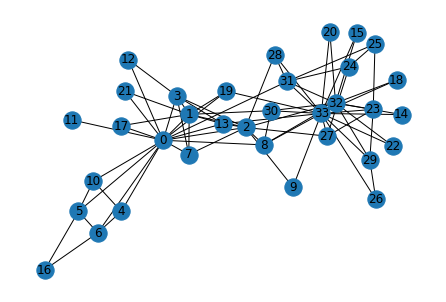

In [7]:
# load the graph
G = nx.karate_club_graph()

# visualize the graph
nx.draw(G, with_labels = True)

In [21]:
def load_img(path):
    im = Image.open(path).convert('L')
    im2 = np.asarray(im)
    print("Shape"+ str(im2.shape))
    section = [im2]

    return section

In [22]:
# params:
 # sections: Seções da imagem
 # opc: quando verdadeiro salva a imagem do grafo
def calc_weights_default(sections, opc=True, r=2, t=0.9):
    s = 1
    gs = []
    for sec in sections:
        print('Iniciando o grafo da secção %i ...' % (s))
        row = np.size(sec, 0)
        col = np.size(sec, 1)

        i = 0
        j = 0

        G = nx.Graph()

        np.seterr(over="ignore")

        r = 2
        t = 0.9

            # pospx = [i,j] e intespx. representando o pixel
        pxdic = dict()

        print("Iniciando calculo dos pesos...")

        cont = 0
        for i in range(1, row - 2):
            for j in range(1, col - 2):
                 # ind = [i+1, j, i, j+1, i+1, j+1]
                ind = [i+1, j, i, j+1, i+1, j+1, i-1, j-1, i-1, j, i+1, j+1, i, j-1, i-1, j+1]
                 #ind = r * [i-1, j, i,j-1, i+1, j, i, j+1]
                base = cont
                pxdic[cont] = dict()
                pxdic[cont]['pospx'] = [i, j]
                pxdic[cont]['intespx'] = sec[i][j]
                G.add_node(cont)
                for k in range(0, int(len(ind)/2)):
                    d = 0
                    d = (((ind[k] - i) ** 2) + ((ind[k+1] - j) ** 2)
                             ) + ((sec[i][j] - sec[ind[k]][ind[k+1]]) ** 2)
                    w = ((d/(255)**2)-(r ** 2))
                    if d <= r and w <= t:
                        cont += 1
                        G.add_node(cont)
                        pxdic[cont] = dict()
                        pxdic[cont]['pospx'] = [k, k+1]
                        pxdic[cont]['intespx'] = sec[k][k+1]
                        G.add_edge(base, cont, weight=w)

        print("Calculo dos pesos finalizado.")

        gs.append(G)
        return G

       

In [23]:
sections = load_img('E:/DataSetCovid/COVID-19_Radiography_Dataset/COVID/COVID-21.png')

Shape(299, 299)


In [24]:
G = calc_weights_default(sections)

Iniciando o grafo da secção 1 ...
Iniciando calculo dos pesos...
Calculo dos pesos finalizado.


In [13]:
G = nx.karate_club_graph()

In [ ]:
import cv2
import numpy as np

In [30]:
image = cv2.imread('E:\DataSetCovid\COVID-19_Radiography_Dataset\COVID\COVID-19.png',cv2.IMREAD_GRAYSCALE)

NameError: name 'cv2' is not defined

In [29]:
image.shape

AttributeError: module 'sklearn.feature_extraction.image' has no attribute 'shape'

In [25]:
G

In [14]:
G 

In [26]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [27]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [28]:

# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

KeyboardInterrupt: 

In [ ]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()